# Challenge 3

In this challenge we will work on the `Orders.csv` data set in the previous [Subsetting and Descriptive Stats lab](../../lab-subsetting-and-descriptive-stats/your-code/main.ipynb). In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

# Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [1]:
# import required libraries
import numpy as np
import pandas as pd

Next, import `Orders.csv` from the "subsetting" lab folder into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [2]:
# enter your code here
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [4]:
# your code here
# Obtaining a list of unique values for Customer ID to check unique values lenght
Customer_ID = list(pd.unique(orders['CustomerID']))
len(Customer_ID)

4339

In [5]:
# Sub Problem 1

In [6]:
spendings_by_customer = orders.loc[:,['CustomerID','amount_spent']].groupby('CustomerID').sum()
spendings_by_customer
# rows in unique_customer_spendings is the same lenght as Customer_ID list

,amount_spent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [7]:
# Sub Problem 2

In [8]:
# Apply ordrs.describe() to check quantiles amounts in amount_spent column
orders.describe()
# quartile 75% is much lower than max, let's check how is amount spent behaving

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [9]:
spendings_by_customer.sort_values('amount_spent', ascending=False)

,amount_spent
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
...,...
17956,12.75
16454,6.90
14792,6.20


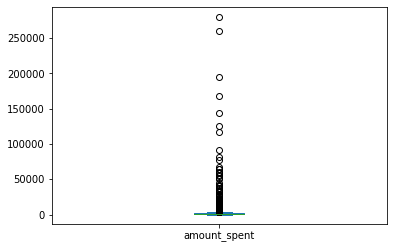

In [10]:
spendings_by_customer["amount_spent"].plot.box();
# box graphic shows 75% of data is fewer than a thousand spent money units

In [11]:
# obtaining quantiles
# example: df['English'].quantile(q=0.9)
q95 = spendings_by_customer['amount_spent'].quantile(q=0.95)
q95

5840.181999999982

In [12]:
q75 = spendings_by_customer['amount_spent'].quantile(q=0.75)
q75

1661.64

In [13]:
# obtaining VIP clients view in dataframe (clients who have spent equal 
# or higher amount than that of the q95)
VIP_customers_df = spendings_by_customer[spendings_by_customer.loc[:,'amount_spent'] >= q95].sort_values('amount_spent',ascending=False)
VIP_customers_df

,amount_spent
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
...,...
14505,5905.64
14415,5900.28
14944,5900.25


In [14]:
VIP_customers = VIP_customers_df.index.values.tolist()
print(VIP_customers)

[14646, 18102, 17450, 16446, 14911, 12415, 14156, 17511, 16029, 12346, 16684, 14096, 13694, 15311, 13089, 17949, 15769, 15061, 14298, 14088, 15749, 12931, 17841, 15098, 13798, 16013, 16422, 12748, 15838, 17404, 17389, 13098, 14680, 13081, 13408, 17857, 16333, 13777, 12753, 12744, 16210, 17675, 17381, 15039, 12471, 12731, 15159, 12901, 12678, 14031, 17428, 13767, 13881, 16839, 12921, 14607, 15856, 17677, 15189, 14051, 15513, 16133, 14866, 16705, 12681, 12621, 12540, 12433, 15498, 12477, 17735, 16525, 14258, 13078, 12536, 15640, 16000, 17340, 12682, 13113, 14606, 12557, 12939, 15125, 14194, 12971, 14895, 12409, 15482, 17581, 13319, 17107, 13340, 14769, 17139, 16779, 17865, 17706, 15251, 14062, 15615, 15502, 16180, 16843, 12590, 13001, 13199, 15078, 12709, 13458, 14733, 16523, 12567, 14367, 14667, 18092, 13969, 12451, 13488, 13090, 16033, 17017, 17243, 17306, 16656, 14527, 12683, 18139, 15358, 16558, 14056, 14936, 16672, 13854, 14952, 18109, 14796, 12428, 15290, 14849, 12757, 17811, 13093

In [15]:
Preferred_customers_df = spendings_by_customer[spendings_by_customer.loc[:,'amount_spent'].apply(lambda x: q75 <= x <= q95)].sort_values('amount_spent',ascending=False)
Preferred_customers_df
# spendings_by_customer[spendings_by_customer.loc[:,'amount_spent'].apply(lambda x: q75 <= x <= q95)]

,amount_spent
CustomerID,
13050,5836.86
12720,5781.73
15218,5756.89
17686,5739.46
13178,5725.47
...,...
17656,1674.69
16115,1667.97
12912,1662.30


In [16]:
Preferred_customers = Preferred_customers_df.index.values.tolist()
print(Preferred_customers)

[13050, 12720, 15218, 17686, 13178, 16553, 13468, 14110, 14049, 17049, 17716, 13004, 18118, 14688, 17757, 12481, 12839, 16767, 16161, 12539, 15805, 18225, 16609, 16985, 16265, 18198, 12490, 17809, 16701, 17719, 17850, 16303, 13269, 15150, 17730, 17061, 18226, 12362, 15046, 16258, 13756, 16191, 15727, 17858, 13599, 15903, 13941, 17602, 16700, 14562, 15301, 13139, 12432, 15719, 17426, 14329, 14755, 12444, 15032, 15547, 12437, 12700, 15786, 14709, 17133, 12664, 12688, 14292, 17652, 15738, 13013, 15555, 17365, 15298, 15187, 17690, 12955, 14180, 15152, 16722, 12714, 14159, 14135, 14191, 15291, 14189, 14390, 14286, 16931, 13802, 15093, 14004, 17613, 17068, 12484, 13267, 15299, 17975, 12524, 14426, 16984, 17364, 12627, 14085, 14534, 13069, 15955, 16626, 15874, 12712, 13505, 12752, 16945, 14016, 14800, 14525, 17567, 18251, 12347, 15034, 17937, 14422, 12500, 17419, 14277, 15804, 17920, 15971, 12747, 14146, 18041, 12949, 15570, 16549, 13384, 13555, 13988, 15514, 12569, 16592, 17940, 17377, 16401

In [17]:
# Labeling the customers in original dataframe
orders['Customer_group'] = np.where(orders['CustomerID'].isin(VIP_customers),
                                   'VIP Customer',
                                   np.where(orders['CustomerID'].isin(Preferred_customers),
                                   'Preferred Customer',
                                   'Regular Customer'))

orders.head(50)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Customer_group
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Preferred Customer
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred Customer
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Preferred Customer
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred Customer
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred Customer
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,Preferred Customer
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,Preferred Customer
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,Preferred Customer
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,Preferred Customer
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,Preferred Customer


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

# Q2: How to identify which country has the most VIP Customers?

# Q3: How to identify which country has the most VIP+Preferred Customers combined?

Provide your solution for Q2 below:

### Q2: How to identify which country has the most VIP Customers?

In [75]:
# your code here
#orders.loc[:,['CustomerID','Country','Customer_group']].groupby(['CustomerID','Country','Customer_group'], as_index=False)
a = orders[['CustomerID','Country']][orders['Customer_group'] == 'VIP Customer'].groupby(['CustomerID','Country'],as_index=False).count()
b = a.groupby('Country').count().sort_values('CustomerID',ascending=False)
b
# Answer should be United Kingdom with 117 VIP clients
# To verify this, I'll aproximate the problem with another method

,CustomerID
Country,
United Kingdom,177
Germany,10
France,9
Switzerland,3
Spain,2
Portugal,2
Australia,2
EIRE,2
Japan,2


In [51]:
# Creating new column 'CustomerType-Country'
orders['CustomerType-Country'] = orders['Country'] + '-' + orders['Customer_group']

In [77]:
VIP = orders[['CustomerID','CustomerType-Country']][orders['Customer_group'] == 'VIP Customer'].groupby(['CustomerID','CustomerType-Country'],as_index=False).count()
VIP.groupby('CustomerType-Country').count().sort_values('CustomerID',ascending=False)
# I get the same result United Kingdom with 117 VIP Customers

,CustomerID
CustomerType-Country,
United Kingdom-VIP Customer,177
Germany-VIP Customer,10
France-VIP Customer,9
Switzerland-VIP Customer,3
Spain-VIP Customer,2
Portugal-VIP Customer,2
Australia-VIP Customer,2
EIRE-VIP Customer,2
Japan-VIP Customer,2


### Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [83]:
a = orders[['CustomerID','Country']][(orders['Customer_group'] == 'Preferred Customer') & (orders['Customer_group'] == 'Preferred Customer')].groupby(['CustomerID','Country'],as_index=False).count()
b = a.groupby('Country').count().sort_values('CustomerID',ascending=False)
b

,CustomerID
Country,
United Kingdom,755
Germany,29
France,20
Belgium,11
Spain,7
Switzerland,6
Norway,6
Italy,5
Portugal,5


# Answer United Kingdom has the most VIP+Preferred Customers combined (177 + 755 = 872 Customers)